In [1]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [2]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        print(f)
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

<gzip _io.BufferedReader name='data/mnist/mnist.pkl.gz' 0x23da5c277c8>


(50000, 784)


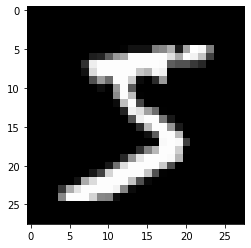

In [3]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [4]:
import torch

In [5]:
x_train, y_train, x_valid, y_valid = map( torch.tensor, (x_train, y_train, x_valid, y_valid) )
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor(0),
 tensor(9))

In [6]:
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [7]:
import math

In [8]:
weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()

bias = torch.zeros(10, requires_grad=True)

In [9]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [10]:
bs = 64  # 一批数据个数

xb = x_train[0:bs]  # 从x获取一小批数据
preds = model(xb)  # 预测值
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-1.7173, -2.7541, -2.6840, -2.5290, -2.1207, -2.1188, -2.1994, -2.5150,
        -2.7610, -2.1744], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [11]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [12]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3141, grad_fn=<NegBackward>)


In [13]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [14]:
print(accuracy(preds, yb))

tensor(0.1250)


In [15]:
from IPython.core.debugger import set_trace

lr = 0.5  # 学习率
epochs = 2  # 训练的轮数

In [16]:
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [17]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0823, grad_fn=<NegBackward>) tensor(1.)
